In [2]:
#Import necessary libraries to carry out this classification
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_train.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (60000,)


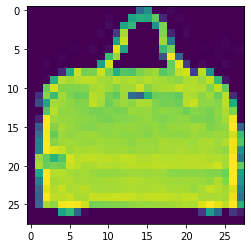

In [6]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))

In [7]:
y_train[220]

8

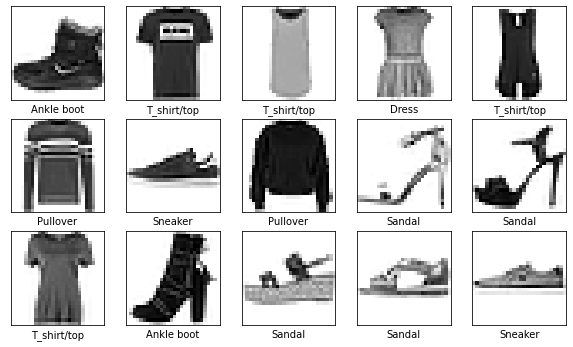

In [9]:
 # Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
#Fitting the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [12]:
# We will create a straightforward CNN architecture with three convolutional␣layers followed by
# three max-pooling layers for this dataset. Convolutional layers will perform␣the convolutional
# operation and extract the features, while the max-pooling layer will␣downsample the features.
cnn_model = Sequential()


In [13]:
 # We are learning 64 filters with a kernel size of 3x3
# First convolutional layer. Number of neurons = 32 filter(kernel) size = 3x3 Activation function = Relu
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))


In [14]:
# Max Pool Layer: It will reduce the size with a kernel size of 2x2
# Since input to CNN is a 2-D image and ouput from last convolutional layer␣(featuerMap) is also 2-D array
# we will use 2D version of Max Pooling function of TensorFlow Keras to create␣a Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size= (2,2)))


In [15]:
# Fully Connected (FC) Layer: Once the convolutional and pooling operations␣are done the layer is flattened and
# fully connected layers are added hence, we need to convert 2-D output (2-D␣array) of last convolutional layer
# (conv3) to 1-D array i.e. we need to flatten the 2-D array to 1-D array
cnn_model.add(Flatten())

In [16]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to␣the number of neurons in just
# immediate previous convolutional layer
cnn_model.add(Dense(32,activation = 'relu'))


In [17]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using'sigmoid' function
cnn_model.add(Dense(10,activation = 'sigmoid'))


In [18]:
 cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 17,066
Trainable params: 17,066
Non-trainable params: 0
____________________________________________________

In [19]:
 ##Once the model architecture is defined, we will compile and build the model.
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer =Adam(learning_rate=0.001),metrics= ['accuracy'])


In [20]:
# history=cnn_model.fit(x_train, y_train, batch_size=32, epochs=10)
history=cnn_model.fit(x_train,y_train,batch_size =512,epochs = 5,verbose =1,validation_data = (x_test,y_test) )


Epoch 1/5
118/118 [==============================] - 4s 26ms/step - loss: 1.3494 - accuracy: 0.5657 - val_loss: 0.7422 - val_accuracy: 0.7338
Epoch 2/5
118/118 [==============================] - 2s 20ms/step - loss: 0.6542 - accuracy: 0.7628 - val_loss: 0.6204 - val_accuracy: 0.7620
Epoch 3/5
118/118 [==============================] - 3s 21ms/step - loss: 0.5638 - accuracy: 0.7953 - val_loss: 0.5591 - val_accuracy: 0.7952
Epoch 4/5
118/118 [==============================] - 2s 21ms/step - loss: 0.5180 - accuracy: 0.8131 - val_loss: 0.5263 - val_accuracy: 0.8057
Epoch 5/5
118/118 [==============================] - 2s 20ms/step - loss: 0.4887 - accuracy: 0.8237 - val_loss: 0.5169 - val_accuracy: 0.8058


In [21]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8058


[0.5168936252593994, 0.8058000206947327]

In [23]:
#make predictions
probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


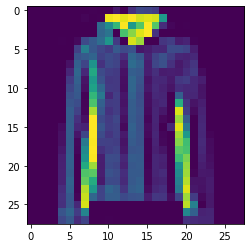

In [24]:
img = x_test[6]
plt.imshow(img)


In [25]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Shirt'

In [26]:
y_actual = class_names[y_test[6]]
y_actual


'Coat'

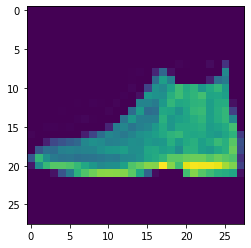

In [27]:
img = x_test[0]
plt.imshow(img)

In [29]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict


'Ankle boot'

In [30]:
y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [31]:
# we are using the normalized input data
test_loss, test_accuracy = cnn_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4839 - accuracy: 0.8233


In [32]:
print(test_accuracy)


0.8233333230018616


In [33]:
print(test_loss)


0.4838580787181854


In [34]:
history.history??

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

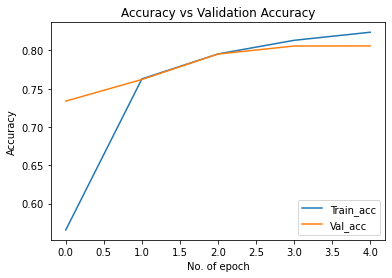

In [36]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()
